# Training a regression model using gradient descent methods in TensorFlow Python

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

import logging
logging.getLogger("tensorflow").disabled = True

## Initial data A

Loading initial data

In [3]:
X_data = np.linspace(-1, 1, 100)

num_coef = 2
coef = [10, 3]
y_data = 0
for i in range(num_coef):
    y_data += coef[i] * np.power(X_data, i)
y_data += np.random.randn(*X_data.shape) * 1.5

Data visualization

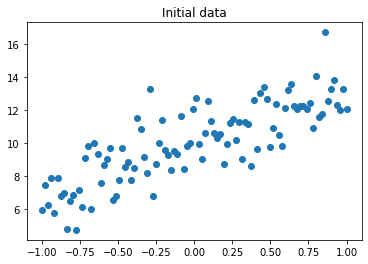

In [4]:
plt.scatter(X_data, y_data)
plt.title("Initial data")
plt.show()

Initialization of parameters

In [5]:
learning_rate_list = [0.06, 0.12, 0.18, 0.24, 0.3, 0.36]
n_epochs = 100

Creating a model

In [6]:
X_data = X_data.reshape([X_data.shape[0], 1])
y_data = y_data.reshape([y_data.shape[0], 1])

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

X = tf.placeholder(tf.float32, shape=[None, 1])
y = tf.placeholder(tf.float32, shape=[None, 1])

weight = tf.Variable(tf.random.normal([1, 1]))
bias = tf.Variable(tf.random.normal([1, 1]))

y_pred = tf.matmul(X, weight) + bias
cost = tf.reduce_mean(tf.square(y - y_pred))

Model training with different learning rate hyperparameters

In [8]:
pred_list = []
loss_list = []
saver = tf.train.Saver()

for learning_rate in learning_rate_list:
    print("Learning rate %f" % learning_rate)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    init = tf.global_variables_initializer()
    loss_list_last = []
    with tf.Session() as session:
        session.run(init)
        for epoch in range(n_epochs):
            session.run(optimizer, feed_dict={X: X_train, y: y_train})
            loss = session.run(cost, feed_dict={X: X_train, y: y_train})
            loss_list_last.append(loss)
            if (epoch + 1) % 10 == 0:
                print("Epoch %d. Loss = %f" % (epoch, loss))
                saver.save(session, "Checkpoints/Data_A_model_lr{}".format(learning_rate), global_step=epoch, write_meta_graph=False, write_state=False)
        w, b = session.run([weight, bias])
        pred = X_test * w + b
        pred_list.append(pred)
        loss_list.append(loss_list_last)
    print("")

Learning rate 0.060000
Epoch 9. Loss = 12.814067
Epoch 19. Loss = 3.905198
Epoch 29. Loss = 2.542516
Epoch 39. Loss = 2.139622
Epoch 49. Loss = 1.976878
Epoch 59. Loss = 1.906075
Epoch 69. Loss = 1.874843
Epoch 79. Loss = 1.861031
Epoch 89. Loss = 1.854921
Epoch 99. Loss = 1.852218

Learning rate 0.120000
Epoch 9. Loss = 2.769695
Epoch 19. Loss = 1.940010
Epoch 29. Loss = 1.866732
Epoch 39. Loss = 1.853221
Epoch 49. Loss = 1.850668
Epoch 59. Loss = 1.850185
Epoch 69. Loss = 1.850094
Epoch 79. Loss = 1.850077
Epoch 89. Loss = 1.850073
Epoch 99. Loss = 1.850073

Learning rate 0.180000
Epoch 9. Loss = 2.118653
Epoch 19. Loss = 1.869886
Epoch 29. Loss = 1.851614
Epoch 39. Loss = 1.850193
Epoch 49. Loss = 1.850082
Epoch 59. Loss = 1.850073
Epoch 69. Loss = 1.850073
Epoch 79. Loss = 1.850073
Epoch 89. Loss = 1.850073
Epoch 99. Loss = 1.850073

Learning rate 0.240000
Epoch 9. Loss = 1.935381
Epoch 19. Loss = 1.852687
Epoch 29. Loss = 1.850153
Epoch 39. Loss = 1.850075
Epoch 49. Loss = 1.85007

Restoring the reference point of a model trained with a learning rate of 0.24 at epoch 89

In [9]:
with tf.Session() as session:
    saver.restore(session, "Checkpoints/Data_A_model_lr0.24-89")
    w1, b1 = session.run([weight, bias])

Choosing the best learning rate

In [10]:
min_score = np.mean(np.abs(pred_list[0] - y_test))
best_learning_rate_number = 0
for i in range(len(learning_rate_list)):
    if np.mean(np.abs(pred_list[i] - y_test)) < np.abs(min_score):
        min_score = np.mean(np.abs(pred_list[i] - y_test))
        best_learning_rate_number = i

print("Best learning rate:", learning_rate_list[best_learning_rate_number])

Best learning rate: 0.3


Plotting the learning curve for the selected learning rate hyperparameter

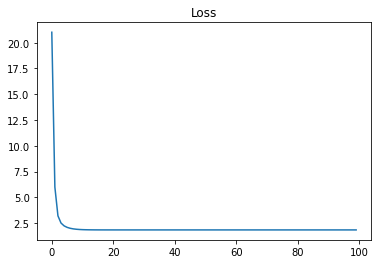

In [11]:
plt.plot(list(range(n_epochs)), loss_list[best_learning_rate_number])
plt.title("Loss")
plt.show()

Plotting a graph with initial data and a regression line

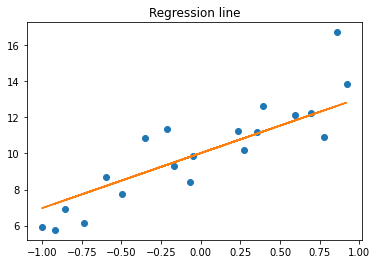

In [12]:
plt.scatter(X_test, y_test)
plt.plot(X_test, pred_list[best_learning_rate_number], color="tab:orange")
plt.title("Regression line")
plt.show()

## Initial data B

Loading initial data

In [13]:
diabetes = load_diabetes()
X_data = diabetes.data
y_data = diabetes.target.reshape([diabetes.target.shape[0], 1])
n_features = X_data.shape[1]
feature_names = diabetes.feature_names

Data visualization

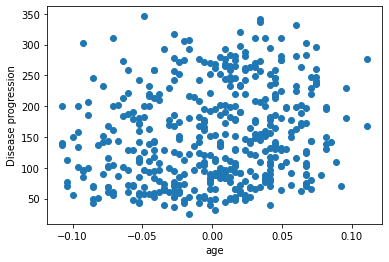

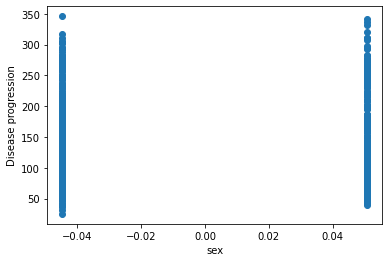

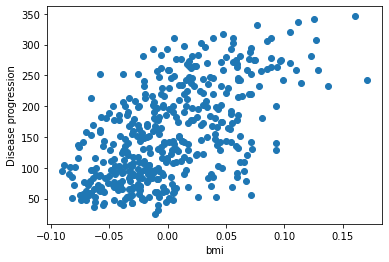

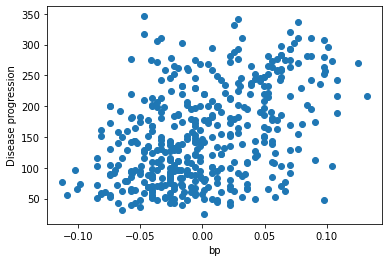

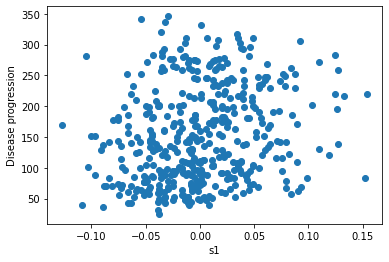

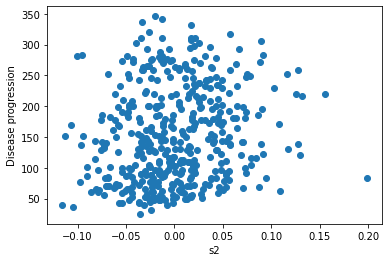

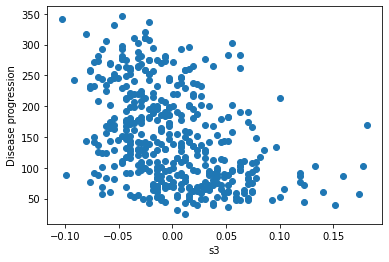

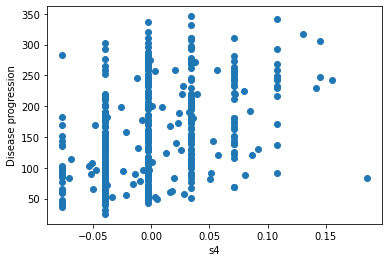

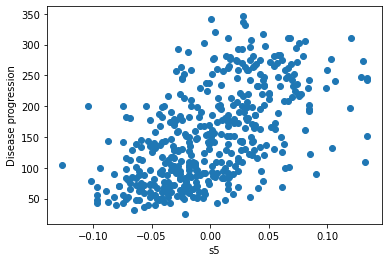

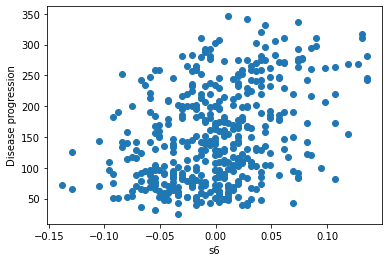

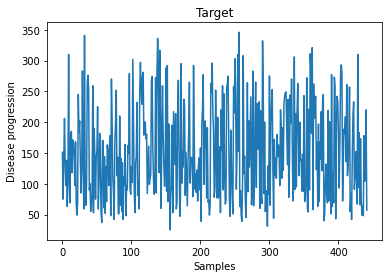

In [14]:
for i in range(n_features):
    plt.scatter(X_data[:, i], y_data)
    plt.xlabel(feature_names[i])
    plt.ylabel("Disease progression")
    plt.show()

plt.plot(y_data)
plt.title("Target")
plt.xlabel("Samples")
plt.ylabel("Disease progression")
plt.show()

Initialization of parameters

In [15]:
learning_rate_list = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
n_epochs = 1000

Creating a model

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)

X = tf.placeholder(tf.float32, shape=[None, n_features])
y = tf.placeholder(tf.float32, shape=[None, 1])

weights = tf.Variable(tf.random.normal([n_features, 1]))
bias = tf.Variable(tf.random.normal([1]))

y_pred = tf.matmul(X, weights) + bias
cost = tf.reduce_mean(tf.square(y - y_pred))

Model training with different learning rate hyperparameters

In [17]:
pred_list = []
loss_list = []
saver = tf.train.Saver()

for learning_rate in learning_rate_list:
    print("Learning rate %f" % learning_rate)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    init = tf.global_variables_initializer()
    loss_list_last = []
    with tf.Session() as session:
        session.run(init)
        for epoch in range(n_epochs):
            session.run(optimizer, feed_dict={X: X_train, y: y_train})
            loss = session.run(cost, feed_dict={X: X_train, y: y_train})
            loss_list_last.append(loss)
            if (epoch + 1) % 10 == 0:
                print("Epoch %d. Loss = %f" % (epoch, loss))
                saver.save(session, "Checkpoints/Data_B_model_lr{}".format(learning_rate), global_step=epoch, write_meta_graph=False, write_state=False)
        pred = session.run(y_pred, feed_dict={X: X_test})
        pred_list.append(pred)
        loss_list.append(loss_list_last)
    print("")

Learning rate 0.400000
Epoch 9. Loss = 5645.544434
Epoch 19. Loss = 5376.695801
Epoch 29. Loss = 5141.170898
Epoch 39. Loss = 4934.448730
Epoch 49. Loss = 4752.636230
Epoch 59. Loss = 4592.383301
Epoch 69. Loss = 4450.805664
Epoch 79. Loss = 4325.418945
Epoch 89. Loss = 4214.083984
Epoch 99. Loss = 4114.956543
Epoch 109. Loss = 4026.447510
Epoch 119. Loss = 3947.186523
Epoch 129. Loss = 3875.989990
Epoch 139. Loss = 3811.839844
Epoch 149. Loss = 3753.852295
Epoch 159. Loss = 3701.267334
Epoch 169. Loss = 3653.426758
Epoch 179. Loss = 3609.760254
Epoch 189. Loss = 3569.774902
Epoch 199. Loss = 3533.042969
Epoch 209. Loss = 3499.194092
Epoch 219. Loss = 3467.906494
Epoch 229. Loss = 3438.900146
Epoch 239. Loss = 3411.931396
Epoch 249. Loss = 3386.787842
Epoch 259. Loss = 3363.285400
Epoch 269. Loss = 3341.260986
Epoch 279. Loss = 3320.573730
Epoch 289. Loss = 3301.097656
Epoch 299. Loss = 3282.725586
Epoch 309. Loss = 3265.360596
Epoch 319. Loss = 3248.916748
Epoch 329. Loss = 3233.32006

Epoch 729. Loss = 2873.198730
Epoch 739. Loss = 2871.809570
Epoch 749. Loss = 2870.486084
Epoch 759. Loss = 2869.225586
Epoch 769. Loss = 2868.024170
Epoch 779. Loss = 2866.879639
Epoch 789. Loss = 2865.788574
Epoch 799. Loss = 2864.748779
Epoch 809. Loss = 2863.757568
Epoch 819. Loss = 2862.812500
Epoch 829. Loss = 2861.911377
Epoch 839. Loss = 2861.052246
Epoch 849. Loss = 2860.232422
Epoch 859. Loss = 2859.450928
Epoch 869. Loss = 2858.705566
Epoch 879. Loss = 2857.994141
Epoch 889. Loss = 2857.315430
Epoch 899. Loss = 2856.667969
Epoch 909. Loss = 2856.049805
Epoch 919. Loss = 2855.459717
Epoch 929. Loss = 2854.896240
Epoch 939. Loss = 2854.358643
Epoch 949. Loss = 2853.845215
Epoch 959. Loss = 2853.354736
Epoch 969. Loss = 2852.886475
Epoch 979. Loss = 2852.439209
Epoch 989. Loss = 2852.011475
Epoch 999. Loss = 2851.603516

Learning rate 0.700000
Epoch 9. Loss = 5435.014648
Epoch 19. Loss = 5030.580566
Epoch 29. Loss = 4708.204590
Epoch 39. Loss = 4449.506348
Epoch 49. Loss = 4240

Epoch 459. Loss = 2879.130371
Epoch 469. Loss = 2876.643799
Epoch 479. Loss = 2874.333496
Epoch 489. Loss = 2872.186279
Epoch 499. Loss = 2870.189941
Epoch 509. Loss = 2868.333984
Epoch 519. Loss = 2866.607910
Epoch 529. Loss = 2865.002197
Epoch 539. Loss = 2863.507812
Epoch 549. Loss = 2862.116943
Epoch 559. Loss = 2860.822021
Epoch 569. Loss = 2859.616211
Epoch 579. Loss = 2858.492676
Epoch 589. Loss = 2857.446289
Epoch 599. Loss = 2856.470703
Epoch 609. Loss = 2855.561523
Epoch 619. Loss = 2854.713623
Epoch 629. Loss = 2853.922363
Epoch 639. Loss = 2853.184570
Epoch 649. Loss = 2852.495605
Epoch 659. Loss = 2851.852539
Epoch 669. Loss = 2851.251953
Epoch 679. Loss = 2850.690918
Epoch 689. Loss = 2850.166992
Epoch 699. Loss = 2849.676514
Epoch 709. Loss = 2849.218506
Epoch 719. Loss = 2848.790039
Epoch 729. Loss = 2848.388916
Epoch 739. Loss = 2848.013428
Epoch 749. Loss = 2847.661621
Epoch 759. Loss = 2847.332520
Epoch 769. Loss = 2847.023926
Epoch 779. Loss = 2846.734863
Epoch 789.

Restoring the reference point of a model trained with a learning rate of 0.24 at epoch 89

In [18]:
with tf.Session() as session:
    saver.restore(session, "Checkpoints/Data_B_model_lr0.8-889")
    w1, b1 = session.run([weights, bias])

Choosing the best learning rate

In [19]:
min_score = np.mean(np.abs(pred_list[0] - y_test))
best_learning_rate_number = 0
for i in range(len(learning_rate_list)):
    if np.mean(np.abs(pred_list[i] - y_test)) < np.abs(min_score):
        min_score = np.mean(np.abs(pred_list[i] - y_test))
        best_learning_rate_number = i

print("Best learning rate:", learning_rate_list[best_learning_rate_number])

Best learning rate: 0.6


Plotting the learning curve for the selected learning rate hyperparameter

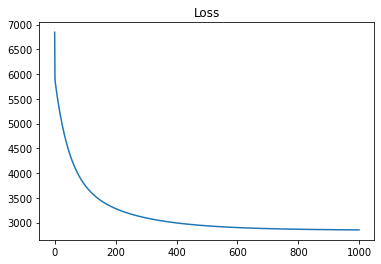

In [20]:
plt.plot(list(range(n_epochs)), loss_list[best_learning_rate_number])
plt.title("Loss")
plt.show()

Plotting a graph with initial data and a regression line

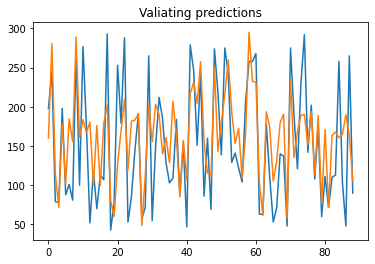

In [21]:
plt.plot(y_test)
plt.plot(pred_list[best_learning_rate_number])
plt.title("Valiating predictions")
plt.show()